In [1]:
# expectation maximization
import data_reader
import numpy as np
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

In [2]:
path2submitsA  = 'iui20_ideaSubmits.csv'
path2requestsA = 'iui20_inspirationRequests.csv'

path2submitsB  = 'iui20_ideaSubmitsPart2.csv'
path2requestsB = 'iui20_inspirationRequestsPart2.csv'

seconds_per_bucket = 30

In [13]:
#load data as sessions
sessionsA = data_reader.load_data_as_sessions_dict(path2submitsA, path2requestsA, seconds_per_bucket)
sessionsB = data_reader.load_data_as_sessions_dict(path2submitsB, path2requestsB, seconds_per_bucket)
sessions = {**sessionsA, **sessionsB}
#sessions = sessionsA

data_reader.add_avoiders_undetermined_and_seekers(sessionsA)
data_reader.add_avoiders_undetermined_and_seekers(sessionsB)

nr_of_bucketsA = len(sessionsA[list(sessionsA.keys())[0]]['requests'])
nr_of_bucketsB = len(sessionsB[list(sessionsB.keys())[0]]['requests'])
nr_of_buckets  = min(nr_of_bucketsA, nr_of_bucketsB)

xA, yA, _, _ = data_reader.create_train_test_dataset(10, sessionsA.keys(), set(), sessionsA, 1.0)
xB, yB, _, _ = data_reader.create_train_test_dataset(10, sessionsB.keys(), set(), sessionsB, 1.0)

In [26]:
xA_avoider = [xA[i] for i in range(len(xA)) if yA[i]==0]
xA_seeker  = [xA[i] for i in range(len(xA)) if yA[i]==1]

xB_avoider = [xB[i] for i in range(len(xB)) if yB[i]==0]
xB_seeker  = [xB[i] for i in range(len(xB)) if yB[i]==1]

print(np.sum(xA_avoider,axis=0))
print(np.sum(xA_seeker, axis=0))


[4 9 7 1 3 2 2 3 1 0]
[ 74 155 108  79 119 122 134 125 141 144]


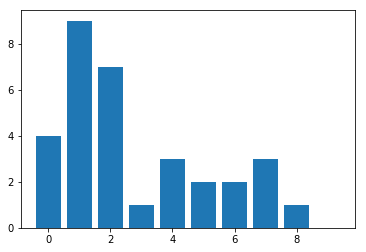

In [34]:
#print(np.sum(xB_avoider,axis=0))
#print(np.sum(xB_seeker, axis=0))
plt.bar(np.arange(len(np.sum(xA_avoider,axis=0))), np.sum(xA_avoider,axis=0))
plt.show()